The EPA's current 24 hour standard for PM 2.5 is 35 µg/m3. Levels above this exceed the standard.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load 1999 data and perform exploratory data analysis

In [2]:
pm0 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_88101_1999.csv') 
print(pm0.info()) #provides basic information on data
print(pm0.ndim) #provides dimensions
print(pm0.shape) #provides number of rows and number of columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103210 entries, 0 to 103209
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           103210 non-null  int64  
 1   County Code          103210 non-null  int64  
 2   Site Num             103210 non-null  int64  
 3   Parameter Code       103210 non-null  int64  
 4   POC                  103210 non-null  int64  
 5   Latitude             103210 non-null  float64
 6   Longitude            103210 non-null  float64
 7   Datum                103210 non-null  object 
 8   Parameter Name       103210 non-null  object 
 9   Sample Duration      103210 non-null  object 
 10  Pollutant Standard   103210 non-null  object 
 11  Date Local           103210 non-null  object 
 12  Units of Measure     103210 non-null  object 
 13  Event Type           103210 non-null  object 
 14  Observation Count    103210 non-null  int64  
 15  Observation Perce

In [3]:
#There are 103,210 rows and 29 columns. Because there are so many columns, look at the first five rows and first 10 columns
pm0.iloc[:5, :10]

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration
0,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR
2,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR
3,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR
4,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR


In [4]:
#Look at the first five rows and next 9 columns
pm0.iloc[:5, 11:20]

,Date Local,Units of Measure,Event Type,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI
0,1999-01-12,Micrograms/cubic meter (LC),None,1,100.0,8.8,8.8,0,37
1,1999-01-15,Micrograms/cubic meter (LC),None,1,100.0,14.9,14.9,0,57
2,1999-01-18,Micrograms/cubic meter (LC),None,1,100.0,3.8,3.8,0,16
3,1999-01-21,Micrograms/cubic meter (LC),None,1,100.0,9.0,9.0,0,38
4,1999-01-24,Micrograms/cubic meter (LC),None,1,100.0,5.4,5.4,0,23


In [5]:
#Look at the first five rows and the final columns
pm0.iloc[:5, 21:]

,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,Andersen RAAS2.5-300 PM2.5 SEQ w/WINS - GRAVIM...,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2014-06-11
1,Andersen RAAS2.5-300 PM2.5 SEQ w/WINS - GRAVIM...,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2014-06-11
2,Andersen RAAS2.5-300 PM2.5 SEQ w/WINS - GRAVIM...,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2014-06-11
3,Andersen RAAS2.5-300 PM2.5 SEQ w/WINS - GRAVIM...,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2014-06-11
4,Andersen RAAS2.5-300 PM2.5 SEQ w/WINS - GRAVIM...,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2014-06-11


In [6]:
#The column of interest is the Arithmetic Mean. Extract that column and print a brief summary
x0 = pm0['Arithmetic Mean']
x0.describe()

count    103210.000000
mean         13.776391
std           9.425582
min           0.000000
25%           7.200000
50%          11.500000
75%          17.900000
max         157.100000
Name: Arithmetic Mean, dtype: float64

### Compare results of 1999 data and summary with Data Analysis Case Study: Changes in Fine Particle Air Pollution in the U.S.

Dr. Peng used raw text files from the EPA. The 1999 PM2.5 dataset had 117,421 rows. The dataset parameters were also
slightly different. The parameter used for analysis was Sample Value. 
"The sample value is the average atmospheric concentration of the parameter in the time window beginning at the sample
begin time and lasting for the sample duration." 
Source:https://aqs.epa.gov/aqsweb/documents/about_aqs_data.html#_the_aqs_data_set <br>
No cleaning of data was described. <br>

summary(x0) for Dr. Peng's 1999 Sample Value  <br>
Min.     0.00  <br>
1st Qu.  7.20  <br>
Median  11.50  <br>
Mean    13.74  <br>
3rd Qu. 17.90  <br>
Max.   157.10  <br>
NA's    13217  <br>

My dataset was a csv file of data summarized on a daily basis. This 1999 PM2.5 dataset had 103,210 rows. 
There were no NA values. The number of NA values in Dr. Peng's raw text file (13,217) combined with the number of rows
in the summarized dataset that I used is 116,427.  According to the EPA AQS website: "historical monitoring or 
calculation methods may be found to be problematic and require that older data be changed." The number of observations
between these two datasets differed by 994 after adjusting for removed NA rows. It's not unreasonable to assume 
those 994 observations were also removed from the summarized file.
No cleaning of data was performed by me.

The summary(x0) for my 1999 Arithmetic Mean (see cell directly above) closely matches Dr. Peng's 1999 Sample Value, with the exception there are no NA values in my dataset.


### Load 2012 data and perform exploratory data analysis

In [7]:
pm1 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_88101_2012.csv')

In [8]:
print(pm1.info())
print(pm1.ndim) 
print(pm1.shape) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276671 entries, 0 to 276670
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           276671 non-null  int64  
 1   County Code          276671 non-null  int64  
 2   Site Num             276671 non-null  int64  
 3   Parameter Code       276671 non-null  int64  
 4   POC                  276671 non-null  int64  
 5   Latitude             276671 non-null  float64
 6   Longitude            276671 non-null  float64
 7   Datum                276671 non-null  object 
 8   Parameter Name       276671 non-null  object 
 9   Sample Duration      276671 non-null  object 
 10  Pollutant Standard   191001 non-null  object 
 11  Date Local           276671 non-null  object 
 12  Units of Measure     276671 non-null  object 
 13  Event Type           276671 non-null  object 
 14  Observation Count    276671 non-null  int64  
 15  Observation Perce

In [9]:
#Again, the column of interest is the Arithmetic Mean. Extract the column and print a brief summary
x1 = pm1['Arithmetic Mean']
x1.describe() 


count    276671.000000
mean          9.141456
std           6.520117
min          -6.312500
25%           5.100000
50%           7.916667
75%          11.700000
max         236.254167
Name: Arithmetic Mean, dtype: float64

### Compare results of 2012 data and summary with Data Analysis Case Study: Changes in Fine Particle Air Pollution in the U.S.

Dr. Peng used raw text files from the EPA. The 2012 PM2.5 dataset had 1,304,290 rows. The parameter used for analysis 
was Sample Value. Dr. Peng discussed the unusual negative minimum value but made no changes to the dataset. 
He also commented on the very elevated maximum value. No cleaning of data was described.

summary(x0) for Dr. Peng's 2012 Sample Value <br>
Min.   -10.00 <br>
1st Qu.   4.00 <br>
Median    7.63 <br>
Mean      9.14 <br>
3rd Qu.  12.00 <br>
Max.    909.00 <br>
NA's     73133 <br>


The dataset I used was a csv file of data summarized on a daily basis. The 2012 PM2.5 dataset had 276,671 rows. 
There were no NA values. The difference in the number of observations between the raw text file and the summarized csv 
file is 1,027,619. It is unclear why there is such a large discrepancy between the number of observations in the raw text
file and the number of observations in the summarized csv file. No initial cleaning of data was performed by me.  

The summary(x0) for my 2012 Arithmetic Mean does not align as closely to Dr. Peng's as the 1999 comparison did.
The means were exactly the same, though. Interestingly, the minimum value in my summary was also a negative value. 
The maximum value in my summary was 236.25, a more reasonable value than 909. Presumably, the 909 observation row was
removed from the summarized csv file that I used for analysis.

### Compare aggregate changes in PM2.5 for years 1999 and 2012

Text(0, 0.5, 'sample values in µg/m3')

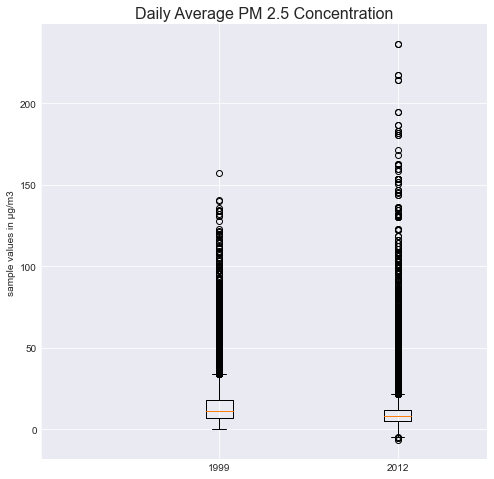

In [10]:
#make boxplots
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = [8, 8]) #make larger
years = [x0, x1]
plt.boxplot(years)
plt.title('Daily Average PM 2.5 Concentration', fontsize=16)
plt.xticks(np.arange(3), ['', '1999','2012'])
plt.ylabel('sample values in µg/m3')
#plt.axhline(y=35, linewidth=1, color='r', label = 'standard')
#plt.legend()

In [11]:
plt.close()

### Compare boxplots

Dr. Peng took the log of the PM 2.5 values to adjust for skew in the data. In R, the code used was 
boxplot(log2(x0), log2(x1)). I was unable to recreate this in python with my data, due to the negative values in my 2012 dataset. Dr. Peng's 2012 dataset also had negative values. In R, taking the log of a negative number results in a NaN value and a warning that something unexpected happened. There isn't an error, though, so a plot is drawn. I will remove the negative values in my datasets and then plot the log2 of the PM 2.5 values to see whether my boxplot looks similar. 

In [12]:
#Look into the number of negative numbers in PM2.5 2012 dataset
countNegativeValues = np.count_nonzero(x1 < 0) #find count of negative values
print(countNegativeValues)
print((countNegativeValues / len(pm1)) * 100) #find percentage of negative values 

1130
0.40842733788506924


In [13]:
#replace negative values in x1 series with 0's
#x1NegativesRemoved = x1.replace(to_replace=np.where(x1 < 0) , value=0)
x1NegativesRemoved = x1[(x1 > 0)]
x1NegativesRemoved.describe()

count    274951.000000
mean          9.202425
std           6.494322
min           0.008333
25%           5.173913
50%           8.000000
75%          11.791667
max         236.254167
Name: Arithmetic Mean, dtype: float64

In [14]:
#compare with x1
x1.describe()

count    276671.000000
mean          9.141456
std           6.520117
min          -6.312500
25%           5.100000
50%           7.916667
75%          11.700000
max         236.254167
Name: Arithmetic Mean, dtype: float64

C:\Users\Mary\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'log2 of sample values')

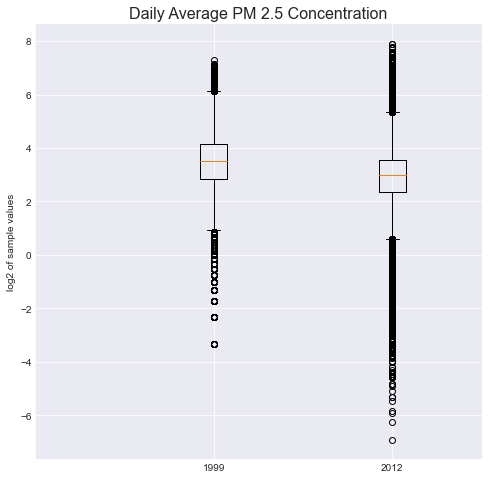

In [15]:
#create boxplots on log2 scale
#boxplot(log2(x0), log2(x1))

fig = plt.figure(figsize = [8, 8]) #make larger
logx0 = np.log2(x0)
logx1 = np.log2(x1NegativesRemoved)
years = [logx0, logx1]
plt.boxplot(years)
plt.title('Daily Average PM 2.5 Concentration', fontsize = 16)
plt.xticks(np.arange(3), ['', '1999','2012'])
plt.ylabel('log2 of sample values')

In [16]:
plt.close()

This boxplot compares very similarly to Dr. Peng's.

### Compare changes in statewide PM 2.5 levels

In [17]:
#calculate the PM 2.5 for each state in 1999 and 2012
mn0 = pm0['Arithmetic Mean'].groupby(pm0['State Code']).mean()
mn1 = pm1['Arithmetic Mean'].groupby(pm1['State Code']).mean()

In [18]:
#Make separate data frames for states / years and merge them
d0 = pd.DataFrame(mn0.to_frame().reset_index())
d0.rename(columns = {'Arithmetic Mean' : 'Mean'}, inplace = True)
d1 = pd.DataFrame(mn1.to_frame().reset_index())
d1.rename(columns = {'Arithmetic Mean' : 'Mean'}, inplace = True)
mrg = pd.merge(d0, d1, on = 'State Code')
mrg.head(5)

,State Code,Mean_x,Mean_y
0,1,19.951238,9.986336
1,2,6.665929,5.673691
2,4,10.795547,8.741076
3,5,15.676067,10.410378
4,6,17.653481,9.263684


[Text(1, 0, '1999'), Text(3, 0, '2012')]

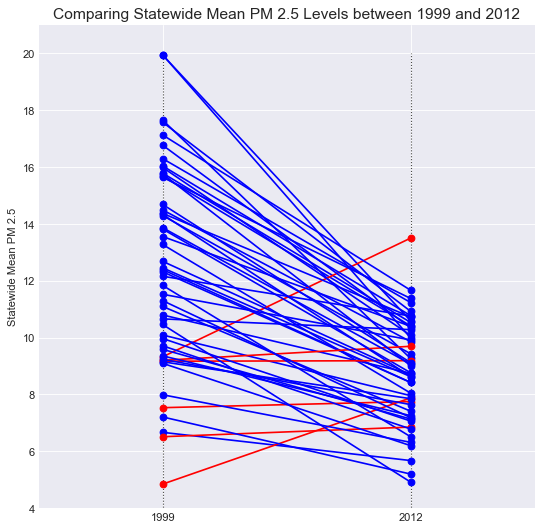

In [19]:
#Code for this plot was modified from slope chart on
#https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
import matplotlib.lines as mlines

def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='blue' if p1[1]-p2[1] > 0 else 'red',  marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(8,8), dpi= 80)

# Vertical Lines 
#ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=1, ymin= 0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=mrg['Mean_x'], x=np.repeat(1, mrg.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=mrg['Mean_y'], x=np.repeat(3, mrg.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(mrg['Mean_x'], mrg['Mean_y'], mrg['State Code']):
    newline([1,p1], [3,p2])
    
# Decoration
ax.set_title('Comparing Statewide Mean PM 2.5 Levels between 1999 and 2012', fontsize = 14)
ax.set(xlim=(0,4), ylim=(4,21), ylabel='Statewide Mean PM 2.5')
ax.set_xticks([1,3])
ax.set_xticklabels(["1999", "2012"])

In [20]:
plt.close()

### Summarize and compare state charts


This chart shows that most of the states had a decrease in average PM 2.5 levels from 1999 to 2012. A handful of states had an increase in PM 2.5 levels. Increases are shown by red lines. This chart compares very similarly to Dr. Peng's.

### End of comparison portion of the PM 2.5 studies